In [7]:
using LinearAlgebra
using PyPlot
using Compat
using WAV
using Base64
using DSP
using FFTW
using Distributions
using GaussianMixtures

include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/preprocessing.jl")
;

In [78]:
# signal preprocessing
sound_file1 = "../data/obama.wav"     # specify sound location
sound_file2 = "../data/airco.wav"     # specify sound location
fs_desired = 8000                     # specify desired sampling frequency
normalization_method = "max"          # specify normalization method
μ = 255                               # specify parameter for μ-law companding and expansion
nr_freqs = 32                         # specify number of Fourier coefficients
pole_location = 0.4092                # specify pole location of warped filter bank (fs=8000: ~4092, fs=16000: ~0.5756)
step_size = 4                         # specify desired stepsize (currently trade-off between step size and distortion) TODO: ask Tanya, Bert or Joris
;

In [80]:
# load signals
x1, fs1 = wavread(sound_file1, format="native")
fs1 = Int(fs1)
x1 = convert(Array{Float64,1}, squeeze(x1[:,1]))[22*fs1:25*fs1]
x2, fs2 = wavread(sound_file2, format="native")
fs2 = Int(fs2)
x2 = convert(Array{Float64,1}, squeeze(x2[:,1]))[1*fs2:4*fs2]

# preprocess signals
y1 = resample(x1, fs_desired/fs1)
y1 = normalize(y1, normalization_method)
#y = μ_law_companding(y, μ)
y1 = warp_fft(y1, pole_location, nr_freqs, step_size=step_size)
y1 = fftcoefs2realimag(y1)

y2 = resample(x2, fs_desired/fs2)
y2 = normalize(y2, normalization_method)
#y = μ_law_companding(y, μ)
y2 = warp_fft(y2, pole_location, nr_freqs, step_size=step_size)
y2 = fftcoefs2realimag(y2)




### perform processing here ###
#y = realimag2fftcoefs(y)
#y = warp_ifft(y, pole_location, step_size)
#y = μ_law_expansion(normalize(y, "max"), μ)



# show segments of data
audioplayers(normalize(x1, "max"), normalize(x2, "max"), fs=fs1)

<source src="data:audio/wav;base64,UklGRnATCABXQVZFZm10ICgAAAD+/wEARKwAABCxAgAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YTQTCACI0M+8HVQYvW/hQr0YKFi9i1tavTmvS73aRTG92WQVvSowCL2WdRK9Oc4vvX2eTr3OSl29QX5fvXDCXr0ROmC9WxdbvRdHPL2Jseu8nXIavPGjm7pgmOi7roODvEMflbwlE1i8xecFvCRRILwohpm85ljOvMr9mrxFQh46WievPJ/Y6TzGi508ujThO3WDpjv1uXE8khvePEMQBT0Y+uM84QW1PFzp5jxtKEQ9KhmOPYmCqD3kE6s9v7SfPfHvmj24xqc9pfy/PR//1T0SI+Y9TyTxPdIL+z3O7AE+EtwEPpDgBj4DFAk+yP4JPjJYCD4GCwU+/lj+PfeJ6j3VIds9BGbaPabd2z2bF8w9mjawPWQjnT1/vJg9yZmTPW7qez2Orzc9XakAPVsIyzzGi508X1woPHRfWbr82zS8NkOlvJdu97z13iy9kUlSvXDCXr0m5WO96sR0vfhJhL1N7Y69PRqjvT37vr3mQdS9D5jbvYLL3b3ZZeS9KxLzvci0Ar4IrQm+NPoMvvnkDb4Rhw2+4kIOviUyEb5dUBS+IjsVvhZqFb7Pgxa+H0QZvkuRHL616hq+YEcQvg+bAb6hPPG9de/tvXjm6b1xF9a9uhO1vaWHlb34SYS9QV97vQRecL1bF1u9MuA3vcynCb2VrL+8DQyCvAjXCLy0Knw65jouPDHwizzTZ408UmFUPFGfHDxsGTQ8fJh3PLjOkTzTZ4087QCJPD+OszwuZQE98kQSPay02TzMgk48vAMLPNNnjTz+YOg8oZgDPYQ/7jzVCuE8clQEPQ6/KT0cXVE9v7VuPc1yej2kHHM9PsVgPQLEVT0PgWE9pzGEPXjOoD1NYrk9Gye+PUOcqT3nKYs9/LZ5PTEHhj1Tb5U99eaWPdJ+hz1TcGQ9bShEPQHjOT23BT89twU/PSJqLT3emQ49WwjLPF9cKDwNKqK7WYMXvGCkVztnA588MtGnPAofuDvgYR28hHxyvGkCW7zUZkm8rPFdvJI5fryhp5O8eTKovOV3sryH77O8bFa4vMu/0rx0DQO903YdvRB4KL243SG903YdvVNnK73NaUG9TlpPvQprTL1Gizu99d4svZdWLr2lEzq9F0c8vWgSL7173Ba9KintvBuqqbys8V28/2yWu6JLKzw0dPs8HF1RPQLDhj2FqpA96iCHPdNgcj3Ncno91lafPfOx0j27afs9wxsCPh/g8T1cAOE9hFboPbdy/z3XxgU+2r0BPr5g9z0f4PE9UhvtPfqA5j36gOY9I9ftPU8k8T0pxeU9DkvOPdc3uz15r7w9WCjJPdFJwz2QcKA97vltPVl9QD2Orzc97Dc2PTYVMT2VnS89PQMpPXdj/jywCDc8nXIavPNTorzK/Zq8kjl+vEQAsbznISG91Rlxvat1jb1K9pK9zd2cvQTxr72wLsG9HHTLveNK2L1dTe69G2wBvke5BL6ZcAO+R7kEvp5TC76vBxO+lW4XvsSyFr4CvxG+LCAJvn+1/b3/xO+9cfjxvVBx/r2xEgO+8uj/vUar7r0Sj9e9gerBvRWlt70Srru9Jlm/vTA+s70UxJu9l8qJvQ31h73XwpC9XqGWvWGYkr1/KIq9+EmEvbVagb0nxn+9PzCDvTVLj71Ys569yuagvWiGir3v0VC9Oc4vvdsmTb38QIC9JJeHva3Dab05zi+9fNX7vMvetrzllpa8NkOlvA7Oubyug4O8RSpAO6y02TypSDM931tGPQfRMT3laCI90p46PQKlcT0PgJI9vL2jPYaLrD1DnKk9TIGdPZZemD0XT6Y9wJW7PaIFxD2r6rc9BpuePWNCgT2jO1c9zJFePXH/jD3QaKc9CZKaPUuhUD0zk988g322PK9VDz0pOUE9rzYrPUxqozxEEuK69TP6u3WDpjtpxdY8L0YdPdbr/DwpKjE8sIK/uwqZQLxbRU+8/Z1svAAwkryVrL+8++sIvUaLO70YKFi9Oa9LvSQjLL38zCS979FQvdfCkL0zNa+9Ts6qvSGgi72tw2m9LbR3vbwplb2Yq6W9FMSbverEdL0/vCe9l273vL/E/rxgQxu9iZkivfQV2rx2j5U6LmUBPcXCSj039kw98yUuPd96Kj2CtGM9pBukPZgg0D1HVd09s7nLPTm3tT18prg9M6rZPQkCAT5qdgs+D+UIPue2/j3ETu89yEXrPfCb8j3yXwE+XqULPiCZED6Zugo+t3L/PaPH+z3Uzwk+MU0YPlyaGz7BEBI+BgsFPrtp+z0tnf097mgFPjoyDD6BGAs+SDb5PVgoyT1MgZ09XVSJPUK7jT0Jkpo9DImWPZZfZz1qpvI8T9DyO8j92zpD4hA8etY/PNYphLqwRbu8zIglvR4WUL2LPHa9Cv6LvXwxjr2FTn6996BkverEdL2ofpG9WLOevdTLlL38QIC9NKJvvSiOg70DEJS9Rv+WvTw5h71wwl69A5w4vWgSL71USEe96sR0ve9kkL0sZpu9uTKZvcAgkb3vZJC9gwCivYHqwb3FuuC9XU3uvaoh5b13Bc6933LAvb7rzL3Td+y9yLQCvmosBL6CrPm9Carjve0vzL0pULu9/QK4vbMlvb3Ovri9gwCivSSXh713kXK9adRmvU5aT72kMh692JvCvO4eKbw9ayq6rHfVO1JhVDyr8qE8acXWPNDcAj0vRh09olo7PTEIVT3052U9F1B1PUiphT1Cu409XVSJPQKlcT3Sf1Y9Fm9ZPZBxbz3Ncno9CZNpPcXCSj3Snjo9PuREPQLEVT0cXVE9FY49PZWdLz3KzyY9hv8HPXXAqjykDWM8dcCqPPJEEj3sNzY9PQMpPXdj/jz8nrA8uM6RPHXAqjzHTdU8MrLDPCkqMTywgr+7TYhDvGCM+brn/GU8CXugPNau+DuSOX68TJgXvZ4lQr0eNTS9t/wFvcu/0rwWhQS99r9IveSegL2GFoK9ETpgvUCdQ73bJk29NKJvveGnhL3N/IC9zkpdvXy9Mr30/RC9AtPlvEQAsbyvZJ+85XeyvL0hq7w/yze85HfzOkPiEDwA8w08lI4fPFpGkzwLHvQ8Q/EgPV9rOD3LsEI95kk+PdiMMj2VnS89twU/PRZvWT1nG2g9+9VdPbAXRz2cbEM9KhpdPWNCgT207o89ll6YPfHvmj3JmZM9u9yHPTEHhj07zZU9zXGrPfLQtj0eHro96OvCPfOx0j0bCNo9gH7QPdRAvz0Kc7Y9ea+8PZ4OyD2bF8w9csHEPajzuz3aLrc9a/KwPaQbpD3gO5M97ReDPcWjZj3mST49gBEQPQs92Dz9f8w8aqbyPEMQBT1pxdY8pA1jPOHnlDs3bTQ7G/McO4ZLnLs1Yom8iNDPvB1s4bz0Fdq8bTfUvOZYzrxSvby8eTKovGxWuLwWhQS9zWlBvabVcb2duIG9V9KCvVDkir35KqC9h9i5vZKeyb13Bc696jjQvYXC2b0CvOu9D5sBvoexC76nLQ++tvUKvlKKBL4mPQG+VoEAvsab/L2hPPG9Carjvfvs170cdMu94mm8vaxWqb0GB5C9mBhmvdRXOb2dRCa9FmYgvSNCEL2xJte8kXdGvIrbejvTZ408QG/PPDOT3zxpxdY88KPcPBPMBT2biyc9cxY8PY6vNz0pWCU9jc4bPfkTJj0pOUE9+9VdPTjXaD1Fs1g9X2s4PcrPJj1LwDQ9vtRSPSoaXT2IwT89a2YMPay02Tyf2Ok8mqoLPSGJET1QzRA9jc4bPXM1ID1yVAQ9JfW3PIKcmjxaJ688JfW3PJ01ljwpKjE8U+dLO6xrZrsI1wi806QRvJQIqLvWKYS6PoMIuxaUFLw1Yom8hg6YvHe/ZrzUZkm8vSGrvJCHGr0zwVO9LNNbvXy9Mr1uG

In [81]:
g1 = GMM(2, y1, kind=:full)
p1 = GMMprior(g1.d, 0.1, 1.0)  ## set α0=0.1 and β0=1, and other values to a default
v1 = VGMM(g1, p1) ## initialize variational GMM v with g
em!(v1, y1)

g2 = GMM(2, y2, kind=:full)
p2 = GMMprior(g2.d, 0.1, 1.0)  ## set α0=0.1 and β0=1, and other values to a default
v2 = VGMM(g2, p2) ## initialize variational GMM v with g
em!(v2, y2)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.160911e+04
      1       1.105516e+04      -5.539516e+02 |        2
      2       1.084405e+04      -2.111064e+02 |        2
      3       1.079222e+04      -5.183025e+01 |        2
      4       1.077896e+04      -1.326067e+01 |        2
      5       1.076935e+04      -9.614252e+00 |     

┌ Info: Initializing GMM, 2 Gaussians diag covariance 31 dimensions using 5992 data points
└ @ GaussianMixtures C:\Users\s151781\.julia\packages\GaussianMixtures\3jRIL\src\train.jl:78


   2
      6       1.076343e+04      -5.915700e+00 |        2
      7       1.075724e+04      -6.189216e+00 |        2
      8       1.074857e+04      -8.674152e+00 |        2
      9       1.073775e+04      -1.081520e+01 |        2
     10       1.072930e+04      -8.454695e+00 |        2
     11       1.072437e+04      -4.928189e+00 |        2
     12       1.072192e+04      -2.447731e+00 |        2
     13       1.071818e+04      -3.741014e+00 |        2
     14       1.071407e+04      -4.112222e+00 |        2
     15       1.071173e+04      -2.338001e+00 |        2
     16       1.071034e+04      -1.389655e+00 |        2
     17       1.070809e+04      -2.250029e+00 |        2
     18       1.070468e+04      -3.414598e+00 |        2
     19       1.070148e+04      -3.190959e+00 |        2
     20       1.070018e+04      -1.300578e+00 |        2
     21       1.069923e+04      -9.565680e-01 |        2
     22       1.069859e+04      -6.388076e-01 |        2
     23       1.069730e+04

┌ Info: K-means with 2000 data points using 33 iterations
│ 31.3 data points per parameter
└ @ GaussianMixtures C:\Users\s151781\.julia\packages\GaussianMixtures\3jRIL\src\train.jl:139


  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.428629e+05
      1       6.105207e+04      -8.181080e+04 |        2
      2       6.060570e+04      -4.463705e+02 |        2
      3       6.056408e+04      -4.162057e+01 |        2
      4       6.054283e+04      -2.124891e+01 |        2
      5       6.052205e+04      -2.077826e+01 |        2
      6       6.050613e+04      -1.592264e+01 |        2
      7       6.049154e+04      -1.458695e+01 |        2
      8       6.048273e+04      -8.809434e+00 |        2
      9       6.047701e+04      -5.721867e+00 |        2
     10       6.047237e+04      -4.644725e+00 |        2
     11       6.046382e+04      -8.542950e+00 |        2


┌ Info: Initializing GMM, 2 Gaussians diag covariance 31 dimensions using 5992 data points
└ @ GaussianMixtures C:\Users\s151781\.julia\packages\GaussianMixtures\3jRIL\src\train.jl:78


     12       6.045277e+04      -1.105748e+01 |        2
     13       6.044562e+04      -7.147548e+00 |        2
     14       6.043994e+04      -5.678756e+00 |        2
     15       6.043770e+04      -2.239979e+00 |        2
     16       6.043712e+04      -5.773908e-01 |        2
     17       6.043671e+04      -4.097826e-01 |        2
     18       6.043648e+04      -2.359750e-01 |        0
     19       6.043648e+04       0.000000e+00 |        0
K-means converged with 19 iterations (objv = 60436.47755465904)


┌ Info: K-means with 2000 data points using 19 iterations
│ 31.3 data points per parameter
└ @ GaussianMixtures C:\Users\s151781\.julia\packages\GaussianMixtures\3jRIL\src\train.jl:139


50-element Array{Float64,1}:
 -0.6936391469078902
 -0.6936031812982612
 -0.693584717626607 
 -0.6935754552716457
 -0.6935713174254319
 -0.6935700972962906
 -0.693570517371356 
 -0.693571803910681 
 -0.6935734744392288
 -0.6935752229745406
 -0.693576854126522 
 -0.6935782434378122
 -0.6935793126764241
  ⋮                 
 -0.6934987632661131
 -0.6934932650087138
 -0.6934875369096765
 -0.6934815534954858
 -0.6934752953710893
 -0.6934687518662035
 -0.69346192350369  
 -0.6934548240018121
 -0.693447481422655 
 -0.6934399381159353
 -0.6934322493183853
 -0.6934244805737252

<source src="data:audio/wav;base64,UklGRnATCABXQVZFZm10ICgAAAD+/wEARKwAABCxAgAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YTQTCACI0M+8HVQYvW/hQr0YKFi9i1tavTmvS73aRTG92WQVvSowCL2WdRK9Oc4vvX2eTr3OSl29QX5fvXDCXr0ROmC9WxdbvRdHPL2Jseu8nXIavPGjm7pgmOi7roODvEMflbwlE1i8xecFvCRRILwohpm85ljOvMr9mrxFQh46WievPJ/Y6TzGi508ujThO3WDpjv1uXE8khvePEMQBT0Y+uM84QW1PFzp5jxtKEQ9KhmOPYmCqD3kE6s9v7SfPfHvmj24xqc9pfy/PR//1T0SI+Y9TyTxPdIL+z3O7AE+EtwEPpDgBj4DFAk+yP4JPjJYCD4GCwU+/lj+PfeJ6j3VIds9BGbaPabd2z2bF8w9mjawPWQjnT1/vJg9yZmTPW7qez2Orzc9XakAPVsIyzzGi508X1woPHRfWbr82zS8NkOlvJdu97z13iy9kUlSvXDCXr0m5WO96sR0vfhJhL1N7Y69PRqjvT37vr3mQdS9D5jbvYLL3b3ZZeS9KxLzvci0Ar4IrQm+NPoMvvnkDb4Rhw2+4kIOviUyEb5dUBS+IjsVvhZqFb7Pgxa+H0QZvkuRHL616hq+YEcQvg+bAb6hPPG9de/tvXjm6b1xF9a9uhO1vaWHlb34SYS9QV97vQRecL1bF1u9MuA3vcynCb2VrL+8DQyCvAjXCLy0Knw65jouPDHwizzTZ408UmFUPFGfHDxsGTQ8fJh3PLjOkTzTZ4087QCJPD+OszwuZQE98kQSPay02TzMgk48vAMLPNNnjTz+YOg8oZgDPYQ/7jzVCuE8clQEPQ6/KT0cXVE9v7VuPc1yej2kHHM9PsVgPQLEVT0PgWE9pzGEPXjOoD1NYrk9Gye+PUOcqT3nKYs9/LZ5PTEHhj1Tb5U99eaWPdJ+hz1TcGQ9bShEPQHjOT23BT89twU/PSJqLT3emQ49WwjLPF9cKDwNKqK7WYMXvGCkVztnA588MtGnPAofuDvgYR28hHxyvGkCW7zUZkm8rPFdvJI5fryhp5O8eTKovOV3sryH77O8bFa4vMu/0rx0DQO903YdvRB4KL243SG903YdvVNnK73NaUG9TlpPvQprTL1Gizu99d4svZdWLr2lEzq9F0c8vWgSL7173Ba9KintvBuqqbys8V28/2yWu6JLKzw0dPs8HF1RPQLDhj2FqpA96iCHPdNgcj3Ncno91lafPfOx0j27afs9wxsCPh/g8T1cAOE9hFboPbdy/z3XxgU+2r0BPr5g9z0f4PE9UhvtPfqA5j36gOY9I9ftPU8k8T0pxeU9DkvOPdc3uz15r7w9WCjJPdFJwz2QcKA97vltPVl9QD2Orzc97Dc2PTYVMT2VnS89PQMpPXdj/jywCDc8nXIavPNTorzK/Zq8kjl+vEQAsbznISG91Rlxvat1jb1K9pK9zd2cvQTxr72wLsG9HHTLveNK2L1dTe69G2wBvke5BL6ZcAO+R7kEvp5TC76vBxO+lW4XvsSyFr4CvxG+LCAJvn+1/b3/xO+9cfjxvVBx/r2xEgO+8uj/vUar7r0Sj9e9gerBvRWlt70Srru9Jlm/vTA+s70UxJu9l8qJvQ31h73XwpC9XqGWvWGYkr1/KIq9+EmEvbVagb0nxn+9PzCDvTVLj71Ys569yuagvWiGir3v0VC9Oc4vvdsmTb38QIC9JJeHva3Dab05zi+9fNX7vMvetrzllpa8NkOlvA7Oubyug4O8RSpAO6y02TypSDM931tGPQfRMT3laCI90p46PQKlcT0PgJI9vL2jPYaLrD1DnKk9TIGdPZZemD0XT6Y9wJW7PaIFxD2r6rc9BpuePWNCgT2jO1c9zJFePXH/jD3QaKc9CZKaPUuhUD0zk988g322PK9VDz0pOUE9rzYrPUxqozxEEuK69TP6u3WDpjtpxdY8L0YdPdbr/DwpKjE8sIK/uwqZQLxbRU+8/Z1svAAwkryVrL+8++sIvUaLO70YKFi9Oa9LvSQjLL38zCS979FQvdfCkL0zNa+9Ts6qvSGgi72tw2m9LbR3vbwplb2Yq6W9FMSbverEdL0/vCe9l273vL/E/rxgQxu9iZkivfQV2rx2j5U6LmUBPcXCSj039kw98yUuPd96Kj2CtGM9pBukPZgg0D1HVd09s7nLPTm3tT18prg9M6rZPQkCAT5qdgs+D+UIPue2/j3ETu89yEXrPfCb8j3yXwE+XqULPiCZED6Zugo+t3L/PaPH+z3Uzwk+MU0YPlyaGz7BEBI+BgsFPrtp+z0tnf097mgFPjoyDD6BGAs+SDb5PVgoyT1MgZ09XVSJPUK7jT0Jkpo9DImWPZZfZz1qpvI8T9DyO8j92zpD4hA8etY/PNYphLqwRbu8zIglvR4WUL2LPHa9Cv6LvXwxjr2FTn6996BkverEdL2ofpG9WLOevdTLlL38QIC9NKJvvSiOg70DEJS9Rv+WvTw5h71wwl69A5w4vWgSL71USEe96sR0ve9kkL0sZpu9uTKZvcAgkb3vZJC9gwCivYHqwb3FuuC9XU3uvaoh5b13Bc6933LAvb7rzL3Td+y9yLQCvmosBL6CrPm9Carjve0vzL0pULu9/QK4vbMlvb3Ovri9gwCivSSXh713kXK9adRmvU5aT72kMh692JvCvO4eKbw9ayq6rHfVO1JhVDyr8qE8acXWPNDcAj0vRh09olo7PTEIVT3052U9F1B1PUiphT1Cu409XVSJPQKlcT3Sf1Y9Fm9ZPZBxbz3Ncno9CZNpPcXCSj3Snjo9PuREPQLEVT0cXVE9FY49PZWdLz3KzyY9hv8HPXXAqjykDWM8dcCqPPJEEj3sNzY9PQMpPXdj/jz8nrA8uM6RPHXAqjzHTdU8MrLDPCkqMTywgr+7TYhDvGCM+brn/GU8CXugPNau+DuSOX68TJgXvZ4lQr0eNTS9t/wFvcu/0rwWhQS99r9IveSegL2GFoK9ETpgvUCdQ73bJk29NKJvveGnhL3N/IC9zkpdvXy9Mr30/RC9AtPlvEQAsbyvZJ+85XeyvL0hq7w/yze85HfzOkPiEDwA8w08lI4fPFpGkzwLHvQ8Q/EgPV9rOD3LsEI95kk+PdiMMj2VnS89twU/PRZvWT1nG2g9+9VdPbAXRz2cbEM9KhpdPWNCgT207o89ll6YPfHvmj3JmZM9u9yHPTEHhj07zZU9zXGrPfLQtj0eHro96OvCPfOx0j0bCNo9gH7QPdRAvz0Kc7Y9ea+8PZ4OyD2bF8w9csHEPajzuz3aLrc9a/KwPaQbpD3gO5M97ReDPcWjZj3mST49gBEQPQs92Dz9f8w8aqbyPEMQBT1pxdY8pA1jPOHnlDs3bTQ7G/McO4ZLnLs1Yom8iNDPvB1s4bz0Fdq8bTfUvOZYzrxSvby8eTKovGxWuLwWhQS9zWlBvabVcb2duIG9V9KCvVDkir35KqC9h9i5vZKeyb13Bc696jjQvYXC2b0CvOu9D5sBvoexC76nLQ++tvUKvlKKBL4mPQG+VoEAvsab/L2hPPG9Carjvfvs170cdMu94mm8vaxWqb0GB5C9mBhmvdRXOb2dRCa9FmYgvSNCEL2xJte8kXdGvIrbejvTZ408QG/PPDOT3zxpxdY88KPcPBPMBT2biyc9cxY8PY6vNz0pWCU9jc4bPfkTJj0pOUE9+9VdPTjXaD1Fs1g9X2s4PcrPJj1LwDQ9vtRSPSoaXT2IwT89a2YMPay02Tyf2Ok8mqoLPSGJET1QzRA9jc4bPXM1ID1yVAQ9JfW3PIKcmjxaJ688JfW3PJ01ljwpKjE8U+dLO6xrZrsI1wi806QRvJQIqLvWKYS6PoMIuxaUFLw1Yom8hg6YvHe/ZrzUZkm8vSGrvJCHGr0zwVO9LNNbvXy9Mr1uG

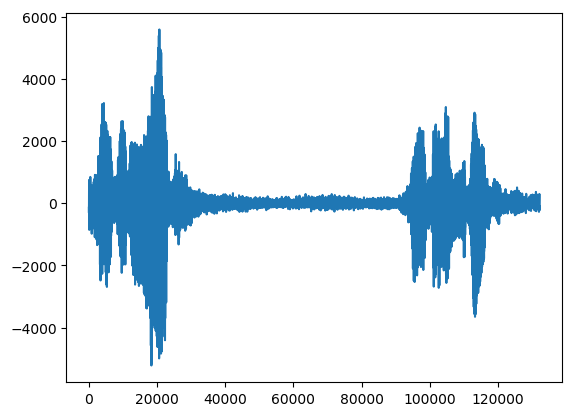

In [82]:
plt.figure()
plt.plot(x1)
audioplayers(normalize(x1, "max"), fs=fs1)

<source src="data:audio/wav;base64,UklGRkDKCABXQVZFZm10ICgAAAD+/wEAgLsAAADuAgAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQTKCADZZIE+FMVuPndzYj572XE+dAOGPqeNhz5LtX8+Fyt+Pihniz4szZo+SEWjPuPjpz79qKg+yR6nPmS9qz7L0a4+4+OnPq9Zpj4YIbE+AA+4PrO/tT7NhLY+GtS4PudJtz6Z+rQ+AA+4PoHouz6B6Ls+Tl66PgLCvz7Tnc0+VSrZPom02j48Zdg+ibTaPqUs4z70Lu0+j83xPnUI8T6PzfE++JT8PkpzBD+9EAQ/VvwAP6RLAz/LTAg/pv4KP0CdDz+O7BE/DRMOP//WCT/LTAg/19UEP+NeAT8xrgM/SnMEPxJa/T51CPE+p9/qPnGi4T7uFdY+VHfRPqHG0z67i9Q+VHfRPjqy0D6hxtM+VHfRPuqvxj7PN74+aCO7Ps2Etj5Mq7I+Tl66PmnWwj5p1sI+HjrIPjxl2D4Kjt4+hwHTPmuJyj5SxMk+6q/GPmuJyj7UUNU+b+/ZPtRQ1T4g7c8+nWDEPhrUuD4Cwr8+nxPMPtHqxT6Z+rQ+yR6nPizNmj7dypA+XPGMPlzxjD6pQI8+94+RPqlAjz4oZ4s+wwWQPsW4lz7FuJc+94+RPsFSiD7ZZIE+2xeJPvv1oD4y5rE+l0etPmIKpD5iCqQ+yR6nPhZuqT59gqw+sQyuPkr4qj4Uu6E+94+RPhcrfj6ssGs+FMVuPuSgfD4mtIM+S7V/PuLtdD4mtIM+RN+TPt3KkD7zKYI+rmNzPnXAWj5rQTQ+ZigdPsnWED6Ge/M9UT7qPcnWED4AxyE+Mp4bPmYoHT6bZSY+NgQrPjpqOj4KRkg+oX49PmmOLD5o2yQ+/WASPoIV5D2puq89BJ2EPf0e9zyFP1y8rCl8ve142r3Dbf+99UT5vbKSDb7vmzW+kFNRvi5YZb5o+32+giaFvgFNgb5o+32+zVx5vi5YZb5efFe+kgZZvieMRr64qyS+5GkHvh9Q1L16Mqm9qKOTvWu6RL1XzpY7jic5PQFuaj062o09qbqvPd73uD1FDLw9F5vRPX+v1D2lVKA9VYQgPckUyDvSt6u8a7pEvQxSh70MUoe9D9hvvawpfL2wb7K9vwfwvUnLAr7lHA++7egtvr93Q74l2T6+Jdk+vlzJT77zAUW+HQ0gvhVBAb5Ujd29sG+yvUX1n72wb7K9sG+yvQxSh70540q9a7pEvdY0V72sKXy9ejKpvbyh4L1+CAy+IXMvvo6gSb5WsDi+tEUVvhmnEL66Xiy+8U49vlawOL4l2T6+kFNRvvkaXL5i4ma+6TqIvnAto76nHbS+3Vq9vpNxyr58X9G+FEvOvmKa0L5+Etm+sZzavpfX2b7NFOO+AlLsvhwX7b7qP/O+7PL6vtF68r4aZOW+TDvfvkjVz77bp7W+10Gmvu9Tn77r7Y++aGGEvuk6iL64Y46+bMeTvu9Tn74lkai+CRmgvp6ejb7nh4C+zVx5vpnSd76bhX++NdeCvk+cg75oYYS+0HWHvuk6iL5QT4u+O/CZvlrOsb6rg8O+EpjGvqnQu77zua6+8Qanvr18pb6/L62+qdC7vsVIxL7FSMS+YOfIvq/p0r7JrtO+fF/Rvsth2761Auq+nfDwvh7K9L6Hkf++kvEFv4ZoCb9GVQu/07cLv6y2Br9UB/6+BAX0vre18b7qP/O+n6P4voS1Ab9sowi/B0INvyEHDr9GVQu/ORkHv7g/A78r3QK/nnoCvwa4+76DK/C+6Yzrvhpk5b7lJty+Fv7Vvnxf0b6Tccq+ePnBvtn0rb6gUZW+6TqIvmhhhL7LqXG+92dUvig/Tr73Z1S+XnxXvvkaXL6XH3C+giaFvtB1h75PnIO+NdeCvmhhhL43ioq+O/CZviPeoL6iBJ2+CRmgvgkZoL45PZK+trCGvhsSgr6XH3C+LlhlvjALbb77zWO+xZBavpcfcL5oYYS+NdeCvv4zc74spV2+WhZIvobUKr4X9Ai+isrmvYZk170XhLW9D7iWvUX1n73iRqy9RfWfvawpfL0AQDK9x5wZvVwiB72ZFJO8hT9cvKis0LxvCbi8TJxDvDVmn7wqSw29pF1dvUlbr73teNq9WPPsvbRFFb7xTj2++RpcvpuFf74feJG+09uWvog/nL7XQaa+vy+tvoylq77XQaa+bnqbvtEoj77QdYe+T5yDvmZIdr5gL1++jqBJvoiHMr6ykg2+hmTXvX6YuL0MUoe9bwm4vBH0LTyK2MU8hlsaPcfKUT2W81c9XFA/PY4nOT1kHF49nb92PfHVLD2046A8SpdGPNEtubpcIge9D9hvvQxSh71F9Z+95ay7veJGrL1Bj5C9Ex6mvVAnzr3lrLu9PSmBvZXFH73St6u8yA9LO/0e9zxs6Hw9FDXCPSyFBD44tzI+QTZZPhISZz5HT3A+fYx5Pqywaz6nl1Q+QTZZPhZ4dj7zKYI+SQJ4Pt6HZT6nl1Q+bfQ7PmmOLD6dGC4+aNskPpVMDz79YBI+mbIePvutCj5347U9lvNXPe6GuTzZVRK8vuJ0vMkUyDvEe948wP4yPam6rz3+Exo+cVpLPhBfXz4WeHY+3cqQPq9Zpj7nSbc+0erFPruL1D4mBuc+d7v4Pjw3AD8X6QI/WK8IP9mIDD/lEQk/pEsDP1+p/z6rRfo+KLnuPr/x4z7wyN0+hwHTPgLCvz4y5rE+y9GuPpdHrT6vWaY+raaePqvzlj7dypA+kHuOPqvzlj4Wbqk+6fy+Pm080j6/8eM+DvTtPii57j4Qp/U+vRAEP6b+Cj/zTQ0/58QQP1wVGD+SUiE/IGgpP9XLLj8IVjA/Yi4vP6FBLT/hVCs/bAQkPwM9GT/bOxQ/NBQTP2brDD+xhwc/WK8IPzJhCz/ZiAw/QJ0PP9s7FD82xxo/klIhP9FlHz8oixY/TtkTPwM9GT/RZR8/LPElP6FBLT8IVjA/LqQtP2IuLz/xQzc/JM44P8lCMj/JQjI/FpI0P4h8LD9sBCQ/n44lP4bJJD9QjBs/TtkTP7M6Dz8LYAY/Kx/+Pisf/j5W/AA/q0X6PltD8D6PzfE+QzH3PnUI8T4O9O0+d7v4Pips9j5xouE+o3nbPnNV6T7aaew+JFPfPr0+3D4mBuc+WZDoPkDL5z6PzfE+q0X6PqmS8j7ApOs+WZDoPm/v2T4Edcc+UBHCPjZMwT42TME+g5vDPjSZuT5iCqQ+XqSUPlzxjD5AeYQ+8ymCPnQDhj4N74I+SQJ4Pn2MeT4mtIM+draNPq2mnj5mcLM+zze+PudJtz4YIbE+fzW0PhrUuD61cr0+NkzBPmgjuz59gqw+x2ufPqlAjz7koHw+RZxoPnMNUz5rQTQ+ZHUVPubD1z1kHF4911AVPNK3q7xcIge94U/pvH6h9bzOaDi9zmg4veFP6bzSt6u8Rf7cvCpLDb3HnBm9Rf7cvM4jP7vuhrk8jic5PQSdhD2puq89f6/UPU3Y2j2CFeQ9vLj8PYZ78z3e97g908WKPSt5RT2046A8WtiQuwtbxLxrukS9rCl8vaijk73teNq9hCEjvsPdUr4A53q+H3iRvqS3pL4Nf6++dJOyvlyBub4SmMa+LhDPvq/p0r6xnNq+5Sbcvnxf0b5GIsi+LF3HvvnSxb4o97e+ivKjvlICk76c64W+/jNzvi5YZb4spV2+jqBJviMmN76KOjq+8wFFvsEqS775Gly+lx9wvpuFf74dxYm+bMeTvm56m75wLaO+vy+tvkAJsb5azrG+qdC7vuHAzL6VJNK+k3HKvpNxyr6v6dK+43PUvv041b6ZiuG+6YzrvrUC6r6BeOi+6YzrvumM676BeOi+NCnmvk7u5r5os+e+59njvjJ23r7+69y+y2HbvmRN2L6xnNq+MnbevrGc2r4ww9a+y2Hbvkw7376xnNq+MMPWvrGc2r7LY

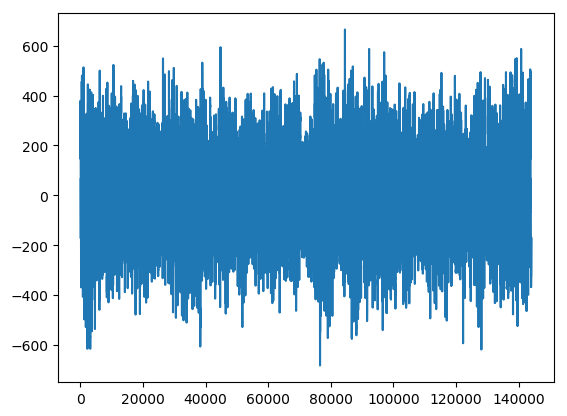

In [83]:
plt.figure()
plt.plot(x2)
audioplayers(normalize(x2, "max"), fs=fs2)

In [84]:
#tmp = llpg(g, y)
#plt.scatter(1:size(y,1), [argmax(tmp[k,:]) for k = 1:size(y,1)], alpha=0.01)

In [70]:
using ForneyLab

In [102]:
fg = FactorGraph()

@RV z1
@RV z2
@RV x1
GaussianMixture(x1, z1, means(g1)[1,:], covars(g1)[1], means(g1)[2,:], covars(g1)[2])
@RV x2 ~ GaussianMixture(z2, means(g2)[1,:], covars(g2)[1], means(g2)[2,:], covars(g2)[2])

MethodError: MethodError: no method matching setindex!(::Tuple{Array{Float64,1},Array{Float64,2},Array{Float64,1},Array{Float64,2}}, ::Variable, ::Int64)

In [106]:
 @ensureVariables(:p)

ErrorException: syntax: invalid assignment location ":p"

In [103]:
means(g1)[1,:]

31-element Array{Float64,1}:
 -0.0008675632708693902 
  0.004817327552515535  
  0.00022130031376723874
 -0.0008079595456512185 
  3.074799326658316e-5  
 -7.997789736125788e-5  
  0.00042702020266574737
  5.4817015495025944e-5 
  0.00018790125606255444
  6.603649815527547e-5  
  0.00017569924152787845
  0.00013970264641417762
  0.0002273644223013656 
  ⋮                     
  0.0003384866628109926 
 -0.00023055543639383772
  0.00024459597975594663
 -0.0006203795172026113 
 -0.0002719704854722785 
  8.297630955483133e-5  
  4.810306009585299e-5  
  7.030460454254441e-5  
  0.00019197238818022375
  5.6363051616615654e-5 
  1.4808453151248819e-5 
 -1.294654926796292e-5  